# Ukraine Russia War Twitter Sentiment Analysis

The war between Russia and Ukraine. Many countries are supporting Ukraine by introducing economics sanctions on Russia. There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting.

### Ukraine Russia War Twitter Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [2]:
data= pd.read_csv("filename.csv")

In [3]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


Let's have a quick look at all column names of the dataset:

In [4]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

We only need three columns for this task (username, tweet and language)

In [5]:
data= data[["username", "tweet", "language"]]

Let's have a look at whether any of these columns contains any null values or not:

In [6]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

So none of the columns has null values, let's have a quick look at how many tweets are posted in which language:

In [7]:
data["language"].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

So most of the tweets are in English. Let's prepare this data for the task of sentiment analysis. Remove all the links, punctuation, symbols and other language errors from the tweets:

In [8]:
nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def clean(text):
    text= str(text).lower()
    text= re.sub('\[.*?\]', '', text)
    text= re.sub('https?://\S+|WWW\.\S+', '', text)
    text= re.sub('<.*?>+', '', text)
    text= re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text= re.sub('/n', '', text)
    text= re.sub('\W*\d\W*', '', text)
    text= [word for word in text.split(' ') if word not in stop_words]
    text= " ".join(text)
    text= [stemmer.stem(word) for word in text.split(" ")]
    text= " ".join(text)
    return text

data.loc[:, "tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sivaramsravantummalapalli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now let's have a look at the wordcloud of the tweets, which will show the most frequently ued words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

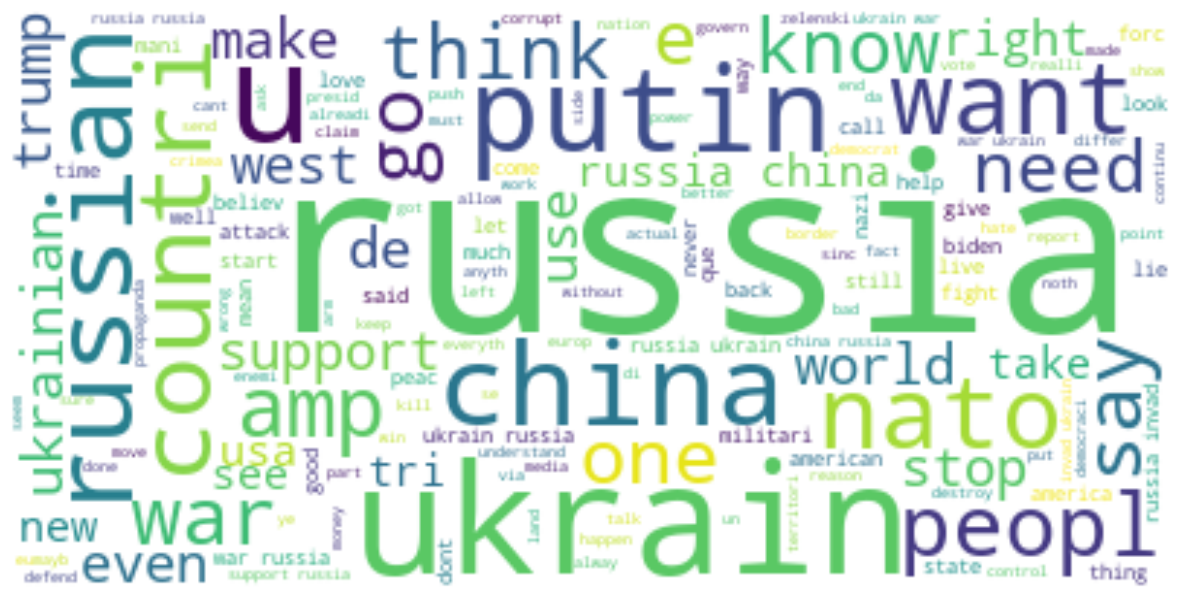

In [9]:
text="".join(i for i in data.tweet)
stopwords= set(STOPWORDS)
wordcloud= WordCloud(stopwords =stopwords, background_color="white"). generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Now let's have a look at the most frequent words used by people with negative sentiments:

In [10]:
data.head()

,username,tweet,language
0,tomasliptai,nazijaeg derwen anonymousrussia place satan ru...,en
1,paperfloure,russia haarp could destroy usa one fell swoop ...,en
2,katetbar1,putin give steven seagal russiaamp order frien...,en
3,jlhrdhmom,mainelif baddcompani it alway project russia,en
4,phemikali,pottingpink mfarussia modrussia milhistrf muze...,en


In [11]:
data.columns

Index(['username', 'tweet', 'language'], dtype='object')

Now add three columns in this dataset as Positive, Negative and Neutral by caluclating the sentiment scores of the tweets:

In [12]:
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
data.loc[:, "Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data.loc[:, "Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data.loc[:, "Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]


data= data[["tweet", "Positive", "Negative", "Neutral"]]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sivaramsravantummalapalli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet,Positive,Negative,Neutral
0,nazijaeg derwen anonymousrussia place satan ru...,0.259,0.000,0.741
1,russia haarp could destroy usa one fell swoop ...,0.000,0.280,0.720
2,putin give steven seagal russiaamp order frien...,0.326,0.000,0.674
3,mainelif baddcompani it alway project russia,0.000,0.000,1.000
4,pottingpink mfarussia modrussia milhistrf muze...,0.065,0.076,0.859


Now let's have a look at the most frequent words used by people with positive sentiments:

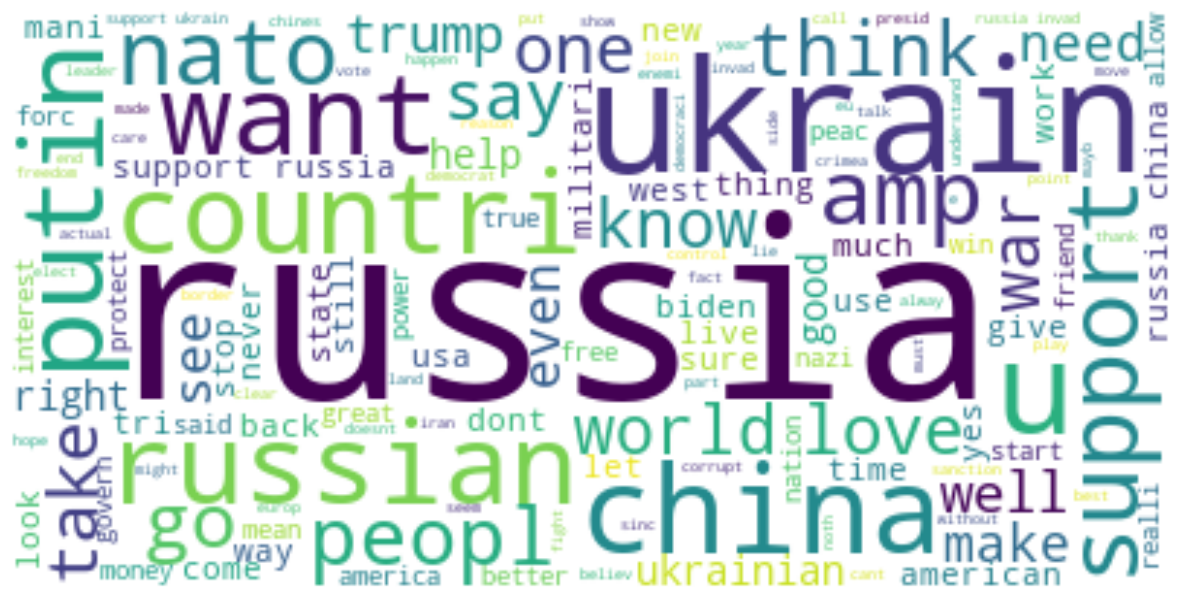

In [13]:
positive = "".join([i for i in data["tweet"][data["Positive"]> data["Negative"]]])
stopwords= set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Now let's have a look at the most frequent words used by people with negative sentiments:

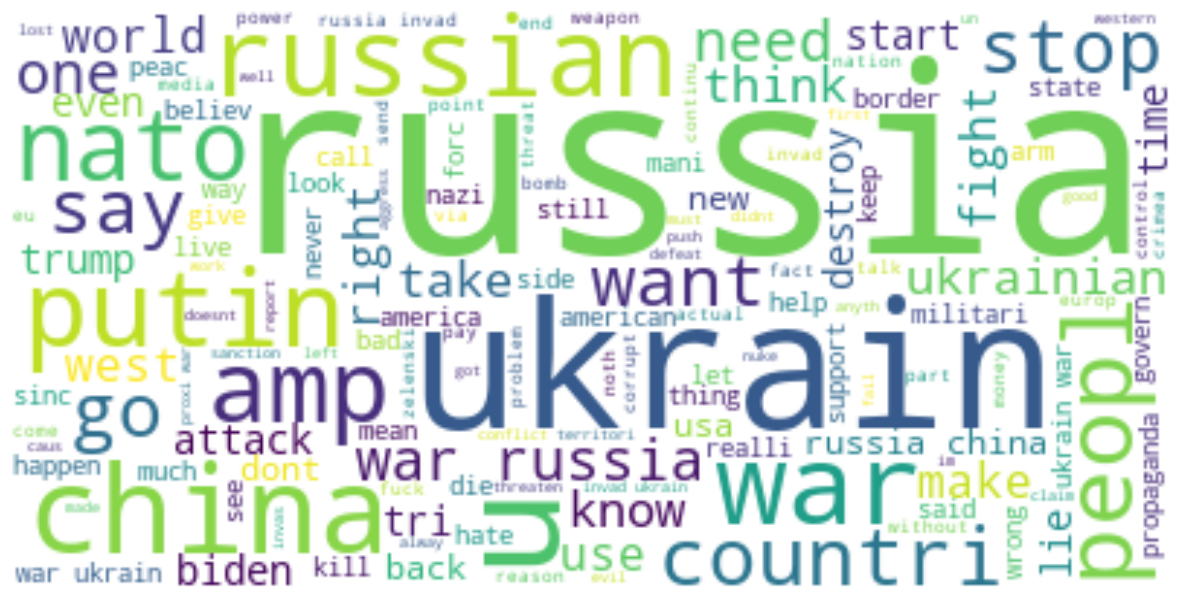

In [14]:
negative = "".join([i for i in data["tweet"][data["Negative"]> data["Positive"]]])
stopwords= set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

So, this is how you can analyze the sentiments of people over the Ukraine and Russia war.

### Summary:

There are lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. I used those tweets for task of twitter sentiment analysis on the Ukraine and Russia war.